In [152]:
!pip install langdetect

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
# utilities
import re
import numpy as np
import os, types
import pandas as pd
# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string

# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [155]:
df=pd.read_csv("/content/drive/MyDrive/NLP/tweets.csv",engine='python')
#d['text'] = d['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))

In [156]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [157]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
# Importing the dataset
df.sample(5)

X.1      X  ... isRetweet  retweeted
2265    2266   2266  ...      True      False
12606  12607  12607  ...     False      False
10697  10698  10698  ...      True      False
3558    3559   3559  ...     False      False
2789    2790   2790  ...      True      False

[5 rows x 16 columns]

In [159]:
df.head()

X.1  X  ... isRetweet  retweeted
0    1  1  ...      True      False
1    2  2  ...      True      False
2    3  3  ...      True      False
3    4  4  ...      True      False
4    5  5  ...      True      False

[5 rows x 16 columns]

In [160]:
df.columns

Index(['X.1', 'X', 'text', 'favorited', 'favoriteCount', 'replyToSN',
       'created', 'truncated', 'replyToSID', 'id', 'replyToUID',
       'statusSource', 'screenName', 'retweetCount', 'isRetweet', 'retweeted'],
      dtype='object')

In [161]:
noOfTweet = len(df)
print('length of data is', noOfTweet)

length of data is 14940


In [162]:
df.shape

(14940, 16)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14940 entries, 0 to 14939
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X.1            14940 non-null  int64  
 1   X              14940 non-null  int64  
 2   text           14940 non-null  object 
 3   favorited      14940 non-null  bool   
 4   favoriteCount  14940 non-null  int64  
 5   replyToSN      1102 non-null   object 
 6   created        14940 non-null  object 
 7   truncated      14940 non-null  bool   
 8   replyToSID     886 non-null    float64
 9   id             14940 non-null  float64
 10  replyToUID     1102 non-null   float64
 11  statusSource   14940 non-null  object 
 12  screenName     14940 non-null  object 
 13  retweetCount   14940 non-null  int64  
 14  isRetweet      14940 non-null  bool   
 15  retweeted      14940 non-null  bool   
dtypes: bool(4), float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [164]:
df.dtypes

X.1                int64
X                  int64
text              object
favorited           bool
favoriteCount      int64
replyToSN         object
created           object
truncated           bool
replyToSID       float64
id               float64
replyToUID       float64
statusSource      object
screenName        object
retweetCount       int64
isRetweet           bool
retweeted           bool
dtype: object

In [165]:
np.sum(df.isnull().any(axis=1))

14054

In [166]:
from textblob import TextBlob

In [167]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)


In [168]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [169]:
tweets = df

In [170]:
for index, tweet in tweets.iterrows():
    st = tweet['text']
    tweet_list.append(st)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(st)
        negative += 1
    elif pos > neg:
        positive += 1
        positive_list.append(st)
    elif pos == neg:
        neutral+=1
        neutral_list.append(st)
        
    
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [171]:
positive

'42.4'

In [172]:
negative

'27.6'

In [173]:
neutral

'30.0'

In [174]:
polarity

7.361361835428909

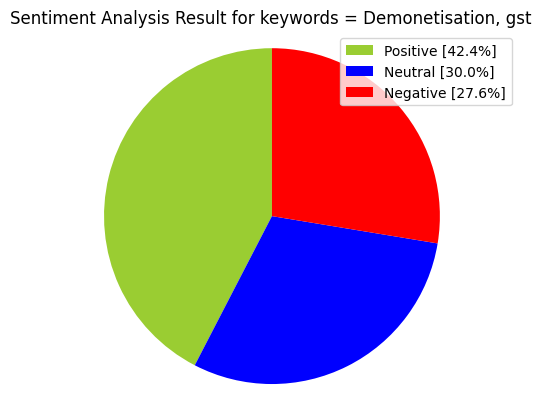

In [175]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue', 'red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keywords = Demonetisation, gst")
plt.axis('equal')
plt.show()

In [176]:
tw_list = pd.DataFrame(tweet_list)
tw_list.drop_duplicates(inplace = True)

In [177]:
len(tw_list)

4792

In [178]:
tw_list["text"] = tw_list[0]

In [179]:
remove_rt = lambda x: re.sub('b[\'|\"]RT\s@\w+: ',"",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list

0                                               text
0        Critical question  Was PayTM informed about ...    critical question  was paytm informed about ...
1        Did yovote on  Demonetization on Modi survey...    did yovote on  demonetization on modi survey...
2        Former FinSec  RBI Dy Governor  CBDT Chair  ...    former finsec  rbi dy governor  cbdt chair  ...
3        Gurugram  Haryana   Post office employees pr...    gurugram  haryana   post office employees pr...
4        Reddy Wedding   cartoon  demonetization  Red...    reddy wedding   cartoon  demonetization  red...
...                                                  ...                                                ...
14933   To The Hill  Shame on yofor your antisemitic ...   to the hill  shame on yofor your antisemitic ...
14935    Ghost of demonetization returns with reports...    ghost of demonetization returns with reports...
14936  N d modi fans d true nationalists of the count...  n d modi fans d true nationalists of the count...
14938     B team of BJP  CIA baby  CCTV  EVM but with...     b team of bjp  cia baby  cctv  evm but with...
14939   B team of BJP  CIA baby  CCTV  EVM but with V...   b team of bjp  cia baby  cctv  evm but with v...

[4792 rows x 2 columns]

In [180]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

0  ... compound
0    Critical question  Was PayTM informed about ...  ...   0.1027
1    Did yovote on  Demonetization on Modi survey...  ...   0.0000
2    Former FinSec  RBI Dy Governor  CBDT Chair  ...  ...   0.0000
3    Gurugram  Haryana   Post office employees pr...  ...   0.0000
4    Reddy Wedding   cartoon  demonetization  Red...  ...   0.0000
5    India s  demonetization   Blackmoney a sympt...  ...   0.0000
6    Rs lakh looted from a bank in Kishtwar in J ...  ...  -0.6249
7    Calling all Nationalists to join    Walk for...  ...   0.5859
8    Many opposition leaders are with  on the  De...  ...   0.2617
9  National reform now destroyed even the essence...  ...  -0.2023

[10 rows x 9 columns]

In [181]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]


In [182]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
pc=count_values_in_column(tw_list,"sentiment")

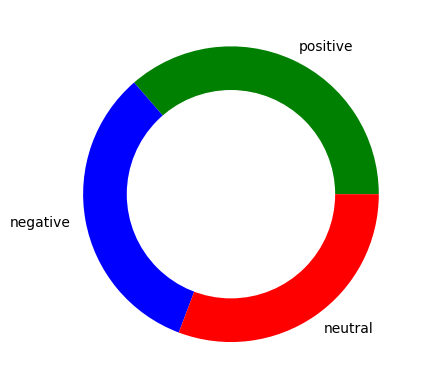

In [183]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [184]:
#Function to Create Wordcloud
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=300,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


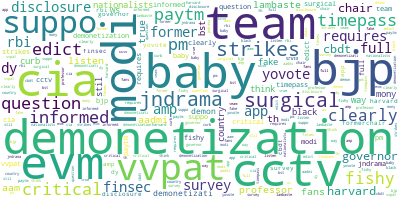

In [185]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


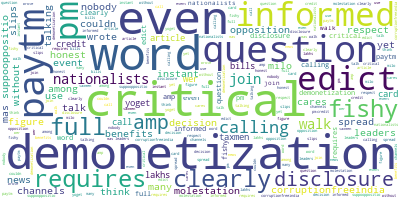

In [186]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


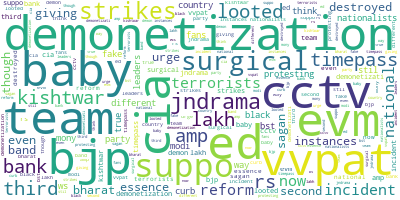

In [187]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)


In [188]:
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

text_len
sentiment          
negative     101.65
neutral       86.57
positive     100.36

In [189]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

text_word_count
sentiment                 
negative             15.64
neutral              12.87
positive             15.49

In [190]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

0  ...                                            stemmed
0    Critical question  Was PayTM informed about ...  ...  [, critic, question, paytm, inform, demonet, e...
1    Did yovote on  Demonetization on Modi survey...  ...            [, yovot, demonet, modi, survey, app, ]
2    Former FinSec  RBI Dy Governor  CBDT Chair  ...  ...  [, former, finsec, rbi, dy, governor, cbdt, ch...
3    Gurugram  Haryana   Post office employees pr...  ...  [, gurugram, haryana, post, offic, employe, pr...
4    Reddy Wedding   cartoon  demonetization  Red...  ...       [, reddi, wed, cartoon, demonet, reddywed, ]

[5 rows x 15 columns]

In [191]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

4792 Number of reviews has 6573 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


aa  aaadhar  aadh  aadhaar  ...  zerch  zero  zindabad  zindagi  zone
0  2   0        0     0        0  ...      0     0         0        0     0
1  2   0        0     0        0  ...      0     0         0        0     0
2  2   0        0     0        0  ...      0     0         0        0     0
3  2   0        0     0        0  ...      0     0         0        0     0
4  2   0        0     0        0  ...      0     0         0        0     0

[5 rows x 6573 columns]

In [192]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

0
demonet  4520
ed        942
india     636
amp       478
modi      394
money     327
peopl     316
cash      272
pm        262
bank      244

In [193]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]

#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams


[('ed ed', 706),
 ('black money', 138),
 ('youtube demonetization', 115),
 ('demonetization india', 78),
 ('india demonetization', 70),
 ('modi demonetization', 63),
 ('pm modi', 58),
 ('post demonetization', 58),
 ('narendra modi', 56),
 ('demonetization effect', 56),
 ('demonetization amp', 53),
 ('demonetization ed', 51),
 ('like demonetization', 51),
 ('india rich', 51),
 ('implement demonetization', 51),
 ('demonetization actually', 48),
 ('impact demonetization', 46),
 ('rich pm', 44),
 ('demonetization modi', 39),
 ('pm narendra', 36)]

In [194]:

#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams


[('ed ed ed', 474),
 ('demonetization ed ed', 51),
 ('india rich pm', 42),
 ('pm narendra modi', 36),
 ('implement demonetization actually', 35),
 ('demonetization actually poor', 35),
 ('modi implement demonetization', 31),
 ('rich pm narendra', 25),
 ('narendra modi implement', 25),
 ('ed ed demonetization', 23),
 ('latest demonetization daily', 21),
 ('dear india rich', 20),
 ('india panic mode', 20),
 ('panic mode cash', 20),
 ('mode cash running', 20),
 ('truth youtube demonetization', 19),
 ('cash running demonetization', 19),
 ('youtube demonetization adsense', 18),
 ('demonetization adsense boycott', 18),
 ('running demonetization creating', 17)]